In [2]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn import *

from sklearn.feature_selection import RFE




In [3]:
df = pd.read_csv('../../../data/Clean_data.csv')

In [4]:
df.dropna(inplace=True)
df.drop(['zipcode', 'lat','long'],axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21242 entries, 0 to 21418
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21242 non-null  float64
 1   bedrooms          21242 non-null  float64
 2   bathrooms         21242 non-null  float64
 3   sqft_living       21242 non-null  float64
 4   sqft_lot          21242 non-null  float64
 5   floors            21242 non-null  float64
 6   waterfront        21242 non-null  int64  
 7   view              21242 non-null  float64
 8   condition         21242 non-null  float64
 9   grade             21242 non-null  float64
 10  sqft_above        21242 non-null  float64
 11  basement          21242 non-null  int64  
 12  yr_built          21242 non-null  float64
 13  yr_renovated      21242 non-null  float64
 14  sqft_living15     21242 non-null  float64
 15  sqft_lot15        21242 non-null  float64
 16  Auburn            21242 non-null  float6

In [5]:


df.describe()
prce, bedrooms, bathroom, sqft_living, sqft_lot, floors. condition, grade,sqft_living_diff, qft_lot_diff, year

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,Seattle,Snoqualmie,Woodinville,sqft_living_diff,sqft_lot_diff,year,x0_fall,x0_spring,x0_summer,x0_winter
count,2.124200e+04,21242.000000,21242.000000,21242.000000,2.124200e+04,21242.000000,21242.000000,21242.000000,21242.000000,21242.000000,...,21242.000000,21242.000000,21242.000000,21242.000000,2.124200e+04,21242.000000,21242.000000,21242.000000,21242.000000,21242.000000
mean,5.408825e+05,3.372187,2.113819,2080.686047,1.518277e+04,1.490514,0.006826,0.234582,3.414085,7.656530,...,0.465022,0.014123,0.022032,93.509651,2.370621e+03,2014.325111,0.233217,0.303079,0.292016,0.171688
std,3.663801e+05,0.902723,0.767231,916.176455,4.165428e+04,0.537136,0.082340,0.766454,0.651569,1.170025,...,0.498787,0.118001,0.146790,599.606992,2.913490e+04,0.468427,0.422889,0.459600,0.454700,0.377118
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,...,0.000000,0.000000,0.000000,-2310.000000,-3.268790e+05,2014.000000,0.000000,0.000000,0.000000,0.000000
25%,3.230000e+05,3.000000,1.750000,1430.000000,5.070000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,0.000000,0.000000,0.000000,-220.000000,-4.197500e+02,2014.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.623000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2014.000000,0.000000,0.000000,0.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.072150e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,1.000000,0.000000,0.000000,310.000000,6.860000e+02,2015.000000,0.000000,1.000000,1.000000,0.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,1.000000,1.000000,1.000000,8690.000000,1.225778e+06,2015.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21242 entries, 0 to 21418
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21242 non-null  float64
 1   bedrooms          21242 non-null  float64
 2   bathrooms         21242 non-null  float64
 3   sqft_living       21242 non-null  float64
 4   sqft_lot          21242 non-null  float64
 5   floors            21242 non-null  float64
 6   waterfront        21242 non-null  int64  
 7   view              21242 non-null  float64
 8   condition         21242 non-null  float64
 9   grade             21242 non-null  float64
 10  sqft_above        21242 non-null  float64
 11  basement          21242 non-null  int64  
 12  yr_built          21242 non-null  float64
 13  yr_renovated      21242 non-null  float64
 14  sqft_living15     21242 non-null  float64
 15  sqft_lot15        21242 non-null  float64
 16  Auburn            21242 non-null  float6

In [4]:
X = df.drop(['price'], axis=1)
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)




base_lr = LinearRegression()
base_lr.fit(X_train,y_train)

kcross_base = cross_val_score(base_lr,X_train,y_train,cv=5)


kcross_base

array([0.74405297, 0.73244656, 0.73619316, 0.73526461, 0.74033492])

In [5]:
base_lr.score(X,y)

0.7362612593137525

Mean Squared error is about 0.7, with a fair amount of variance so the fit isn't great, may want to start adjusting to see what can improve. R^2 is 0.73, which is decent but could probably be improved with simple adjustments such as standardization.

In [6]:
X = df.drop(['price'], axis=1)
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

fit_lr = LinearRegression()
fit_lr.fit(X_train,y_train)

kcross_fit = cross_val_score(fit_lr,X_train,y_train,cv=5)


kcross_fit

array([0.74397555, 0.7324418 , 0.73599671, 0.73526683, 0.74044842])

In [7]:
fit_lr.score(X_train,y_train)

0.741411271266943

That didn't make much of a difference it seems, well then let's explore whethor all of these determinents are necessary or wether they can be removed.

In [8]:
#fig, ax = plt.subplots(figsize=(30,30))    
#sns.heatmap(df.corr(), annot=True);

Interesting things: since year built and year renovated are so similar only 1 should really, be used, of the 2 year built has the stronger correlation, however it's a negative correlation indicating for higher class homes be older is desireable. 
-bathroom count has a much stronger correlation than bedroom but neither are super strong(combine?). 
-sqft lot is an extremely weak correlation (could be dropped)
-floors is also a ver weak correlation
-similarly sqft_living15 and sqft_lot15** are also very weak
-sqft_lot_diff is tiny(drop)

In [9]:
#expirement 1: drop year renovated
X = df.drop(['price','yr_renovated'], axis=1)
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

drop_1_lr = LinearRegression()
drop_1_lr.fit(X_train,y_train)

kcross_drop_1 = cross_val_score(drop_1_lr,X_train,y_train,cv=5)


kcross_drop_1

array([0.74410199, 0.73307005, 0.73562163, 0.73503313, 0.73986563])

In [10]:
drop_1_lr.score(X_train,y_train)

0.7411348607797915

Ok that helped a fair bit, let's also do independant tests of dropping the other possibilities

In [11]:
#expirement 2: drop sqft lot

In [12]:

X = df.drop(['price','sqft_lot'], axis=1)
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

drop_2_lr = LinearRegression()
drop_2_lr.fit(X_train,y_train)

kcross_drop_2 = cross_val_score(drop_2_lr,X_train,y_train,cv=5)


kcross_drop_2

array([0.74391482, 0.73246561, 0.73619312, 0.73525432, 0.74043448])

In [13]:
drop_2_lr.score(X_train,y_train)

0.7414115739726365

This also seems a bit better but not as much change as with dropping yr_renovated

In [14]:
#expirement 3: drop floors
X = df.drop(['price','floors'], axis=1)
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

drop_3_lr = LinearRegression()
drop_3_lr.fit(X_train,y_train)

kcross_drop_3 = cross_val_score(drop_3_lr,X_train,y_train,cv=5)


kcross_drop_3

array([0.74354804, 0.73142044, 0.73580764, 0.73481958, 0.74033168])

In [15]:
drop_3_lr.score(X_train,y_train)

0.7408932486820232

dropping this didn't really make much of a difference so we might want to further expirement with it later

In [16]:
#expirement 4:drop sqft_lot15
X = df.drop(['price','sqft_lot15'], axis=1)
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

drop_4_lr = LinearRegression()
drop_4_lr.fit(X_train,y_train)

kcross_drop_4 = cross_val_score(drop_4_lr,X_train,y_train,cv=5)


print(kcross_drop_4)
print(drop_4_lr.score(X_train,y_train))

[0.74407865 0.73243109 0.73599473 0.73528618 0.74044507]
0.7414114048725855


decent improvement: let's speed this up, by just dropping the bunch and seeing what happens

In [17]:
#test 5 mass drop
X = df.drop(['price', 'sqft_lot_diff', 'sqft_living15', 'sqft_lot', 'floors', 'sqft_lot15','yr_renovated'], axis=1)
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

drop_5_lr = LinearRegression()
drop_5_lr.fit(X_train,y_train)

kcross_drop_5 = cross_val_score(drop_5_lr,X_train,y_train,cv=5)


print(kcross_drop_5)
print(drop_5_lr.score(X_train,y_train))

[0.74349472 0.73178623 0.734897   0.73395134 0.73958036]
0.7401631097537034


overall dropping some of the weaker predictors hasn't affected much but since they'll muddle the model overall we should probably just leave them out

In [18]:
df.drop([ 'sqft_lot_diff', 'sqft_living15', 'sqft_lot', 'floors', 'sqft_lot15'], axis=1, inplace =True)

strategies for tommorow:
RFE could be used to find the strongest features and use them, for example I could do just the strongest 10 or so, see how that works
Polynomial testing could also be used to help optimize, purhapse I could combine the techniques, see what stats stand out and work up from there.
target: I would like to try and get up to at least 0.8 ish for an r^2 value
could scale and log the price
current 43ish columns, might want to cut down to 20ish, could be more efficent (needs testing(

For my first fix of the day I heard from my partners that they're models saw a lot of improvment from scaling and log transforming their price data so let's give that a try

In [19]:
X = df.drop(['price'], axis=1)
y = df[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_scale = StandardScaler()
y_train = y_scale.fit_transform(y_train)
y_test = y_scale.transform(y_test)

y_scale_lr = LinearRegression()
y_scale_lr.fit(X_train,y_train)

kcross_y_scale = cross_val_score(y_scale_lr,X_train,y_train,cv=5)


print(kcross_y_scale)
print(y_scale_lr.score(X_train,y_train))

[0.74396205 0.73243643 0.73596402 0.73526225 0.74044455]
0.7414111256829028


In [ ]:
df.describe()

In [1]:
norm_check = ['yr_built','yr_renovated','sqft_living_diff']


pd.plotting.scatter_matrix(df[norm_check], figsize=(10,12));
#transform(price,bathroomss,sqft_living,view, condition, grade, yr_built,yr_renovated)
df.info()

NameError: name 'pd' is not defined

scaling alone didn't help much, let's log scale the non normal variables

In [21]:
X = df.drop(['price'], axis=1)
y = df[['price']]


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)

y_train = np.log(y_train)
y_test = np.log(y_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_scale = StandardScaler()
y_train = y_scale.fit_transform(y_train)
y_test = y_scale.transform(y_test)




y_scale_lr = LinearRegression()
y_scale_lr.fit(X_train,y_train)

kcross_y_scale = cross_val_score(y_scale_lr,X_train,y_train,cv=5)


print(kcross_y_scale)
print(y_scale_lr.score(X_train,y_train))

[0.78846662 0.78070737 0.78532041 0.78442703 0.77919531]
0.7849094219465815


Ok that made a significant improvement to the model, will definently keep that in the final model. Now since we've done a lot of the easy fixes let's go back and try and rebuild this model from nearly scratch, by using rfe to only indentify and use the strongest correlations.

In [22]:
X = df.drop(['price'], axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
lr_rfe = LinearRegression()
select = RFE(lr_rfe, n_features_to_select=10)
select.fit(X=X, y=df['price'])
list(zip(df.columns, select.support_))

[('price', False),
 ('bedrooms', False),
 ('bathrooms', True),
 ('sqft_living', False),
 ('sqft_lot', False),
 ('floors', False),
 ('waterfront', False),
 ('view', False),
 ('condition', True),
 ('grade', False),
 ('sqft_above', False),
 ('basement', False),
 ('yr_built', False),
 ('yr_renovated', True),
 ('sqft_living15', False),
 ('sqft_lot15', False),
 ('Auburn', True),
 ('Bellevue', False),
 ('Black_diamond', False),
 ('Bothell', False),
 ('Duball', False),
 ('Enumclaw', False),
 ('Fall city', True),
 ('Federal_way', False),
 ('Issaquah', False),
 ('Kenmore', False),
 ('Kent', True),
 ('Kirkland', False),
 ('Maple Valley', True),
 ('Medina', True),
 ('Mercer Island', False),
 ('North Bend', False),
 ('Renton', False),
 ('Sammamish', True),
 ('Seattle', False),
 ('Snoqualmie', False),
 ('Woodinville', True),
 ('sqft_living_diff', False),
 ('sqft_lot_diff', False),
 ('year', False),
 ('x0_fall', False),
 ('x0_spring', False),
 ('x0_summer', False)]

In [23]:
select

RFE(estimator=LinearRegression(), n_features_to_select=10)

Top 10 predictors is a bit weird, only yr_renovated and the booleans for a bunch of values but let's try just using these predictors in a model

In [24]:
features = ['yr_renovated','Auburn','Enumclaw','Fall city', 'Kenmore',
            'Kent','Kirkland','Maple Valley','Medina','Sammamish']
X = df[features]
y = df[['price']]


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)

y_train = np.log(y_train)
y_test = np.log(y_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_scale = StandardScaler()
y_train = y_scale.fit_transform(y_train)
y_test = y_scale.transform(y_test)




y_scale_lr = LinearRegression()
y_scale_lr.fit(X_train,y_train)

kcross_y_scale = cross_val_score(y_scale_lr,X_train,y_train,cv=5)


print(kcross_y_scale)
print(y_scale_lr.score(X_train,y_train))

[0.18514273 0.18032271 0.18706239 0.17046884 0.19066176]
0.18324604041031312


This has definently weakened the model and way too much, let's do this again but with the top 15 predictors

In [25]:
X = df.drop(['price'], axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
lr_rfe = LinearRegression()
select = RFE(lr_rfe, n_features_to_select=5)
select.fit(X=X, y=df['price'])
list(zip(df.columns, select.support_))

[('price', False),
 ('bedrooms', False),
 ('bathrooms', True),
 ('sqft_living', False),
 ('sqft_lot', False),
 ('floors', False),
 ('waterfront', False),
 ('view', False),
 ('condition', True),
 ('grade', False),
 ('sqft_above', False),
 ('basement', False),
 ('yr_built', False),
 ('yr_renovated', False),
 ('sqft_living15', False),
 ('sqft_lot15', False),
 ('Auburn', True),
 ('Bellevue', False),
 ('Black_diamond', False),
 ('Bothell', False),
 ('Duball', False),
 ('Enumclaw', False),
 ('Fall city', False),
 ('Federal_way', False),
 ('Issaquah', False),
 ('Kenmore', False),
 ('Kent', False),
 ('Kirkland', False),
 ('Maple Valley', True),
 ('Medina', False),
 ('Mercer Island', False),
 ('North Bend', False),
 ('Renton', False),
 ('Sammamish', True),
 ('Seattle', False),
 ('Snoqualmie', False),
 ('Woodinville', False),
 ('sqft_living_diff', False),
 ('sqft_lot_diff', False),
 ('year', False),
 ('x0_fall', False),
 ('x0_spring', False),
 ('x0_summer', False)]

In [26]:
features = ['price']

X = df.drop(features,axis=1)
y = df[['price']]


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)

y_train = np.log(y_train)
y_test = np.log(y_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_scale = StandardScaler()
y_train = y_scale.fit_transform(y_train)
y_test = y_scale.transform(y_test)




y_scale_lr = LinearRegression()
y_scale_lr.fit(X_train,y_train)

kcross_y_scale = cross_val_score(y_scale_lr,X_train,y_train,cv=5)


print(kcross_y_scale)
print(y_scale_lr.score(X_train,y_train))

[0.78846662 0.78070737 0.78532041 0.78442703 0.77919531]
0.7849094219465815


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21242 entries, 0 to 21418
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21242 non-null  float64
 1   bedrooms          21242 non-null  float64
 2   bathrooms         21242 non-null  float64
 3   sqft_living       21242 non-null  float64
 4   sqft_lot          21242 non-null  float64
 5   floors            21242 non-null  float64
 6   waterfront        21242 non-null  int64  
 7   view              21242 non-null  float64
 8   condition         21242 non-null  float64
 9   grade             21242 non-null  float64
 10  sqft_above        21242 non-null  float64
 11  basement          21242 non-null  int64  
 12  yr_built          21242 non-null  float64
 13  yr_renovated      21242 non-null  float64
 14  sqft_living15     21242 non-null  float64
 15  sqft_lot15        21242 non-null  float64
 16  Auburn            21242 non-null  float6

In [28]:
df.corr()['yr_built']['price']

0.0479616543805167

In [29]:
df.corr()['condition']['price']

0.036222811651648354

In [30]:
df.corr()['sqft_living']['price']

0.7001107489171242

In [31]:
df['test'] = df['condition'] * df['yr_built']
df.corr()['test']['price']

0.03954978365451772

In [32]:
#drop sqft lot diff, sqft_living15
#replace yr_renovated with yr_renovated - 'yr_built'
#replace basement with sqft_above - sqft_living
#replace year with year - yr_built (0.25286747067857296)

RFE was a bit of a bust so let's try out some feature modification

In [33]:
df['yr_till_renovation'] = df['yr_renovated'] - df['yr_built']
df['sqft_living-above'] = df['sqft_above'] - df['sqft_living']
df['yr_since_built'] = df['year'] - df['yr_built']
to_drop = ['sqft_lot_diff','sqft_living15','yr_renovated','basement','year']
df.drop(to_drop,axis=1,inplace=True)

In [34]:
features = ['price']

X = df.drop(features,axis=1)
y = df[['price']]


X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=20)

y_train = np.log(y_train)
y_test = np.log(y_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_scale = StandardScaler()
y_train = y_scale.fit_transform(y_train)
y_test = y_scale.transform(y_test)




y_scale_lr = LinearRegression()
y_scale_lr.fit(X_train,y_train)

kcross_y_scale = cross_val_score(y_scale_lr,X_train,y_train,cv=5)


print(kcross_y_scale)
print(y_scale_lr.score(X_train,y_train))

[0.78644246 0.77899278 0.78506699 0.78277867 0.78200962]
0.7841642484178578


In [19]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,Seattle,Snoqualmie,Woodinville,sqft_living_diff,sqft_lot_diff,year,x0_fall,x0_spring,x0_summer,x0_winter
price,1.000000,0.315489,0.523554,0.700111,0.087857,0.257886,0.263293,0.394071,0.036223,0.665936,...,0.020874,-0.003567,0.031440,0.403289,0.049907,0.000262,0.001793,-0.006999,0.004448,0.001156
bedrooms,0.315489,1.000000,0.529223,0.593188,0.033279,0.187680,-0.003146,0.080454,0.023311,0.367529,...,-0.185116,0.024902,0.024449,0.445390,0.018152,-0.010390,0.002366,-0.006938,0.004051,0.000917
bathrooms,0.523554,0.529223,1.000000,0.755940,0.088031,0.503316,0.062969,0.186105,-0.126398,0.664513,...,-0.208438,0.068436,0.043676,0.503889,0.043124,-0.029610,0.001580,-0.010183,0.008870,-0.000057
sqft_living,0.700111,0.593188,0.755940,1.000000,0.172119,0.358539,0.104336,0.282074,-0.060347,0.762367,...,-0.218916,0.065819,0.080648,0.665854,0.073888,-0.031567,-0.002725,-0.009928,0.011709,0.001037
sqft_lot,0.087857,0.033279,0.088031,0.172119,1.000000,-0.003450,0.021483,0.075554,-0.009976,0.113437,...,-0.138971,0.006460,0.092889,0.099997,0.755129,0.005506,-0.010818,0.003407,-0.000581,0.008679
floors,0.257886,0.187680,0.503316,0.358539,-0.003450,1.000000,0.021157,0.028848,-0.263395,0.459227,...,-0.036866,0.086419,0.014891,0.222888,0.003636,-0.024884,-0.000934,-0.003991,-0.001380,0.007576
waterfront,0.263293,-0.003146,0.062969,0.104336,0.021483,0.021157,1.000000,0.381187,0.016636,0.082979,...,0.024728,-0.009923,-0.012443,0.063986,0.001935,-0.006275,0.001600,0.008775,-0.013005,0.003192
view,0.394071,0.080454,0.186105,0.282074,0.075554,0.028848,0.381187,1.000000,0.044459,0.249708,...,0.069430,0.010216,-0.038407,0.113236,0.038856,-0.000266,-0.004956,0.000369,-0.000961,0.006267
condition,0.036223,0.023311,-0.126398,-0.060347,-0.009976,-0.263395,0.016636,0.044459,1.000000,-0.148139,...,0.016031,-0.067494,-0.020079,0.015841,-0.010279,-0.047458,-0.006728,0.000490,-0.003110,0.010697
grade,0.665936,0.367529,0.664513,0.762367,0.113437,0.459227,0.082979,0.249708,-0.148139,1.000000,...,-0.183784,0.021156,0.091210,0.349395,0.049799,-0.034359,0.005571,-0.009520,0.009429,-0.006014


[0.74711514 0.68070726 0.76656255 0.74813784 0.73221824]
0.7535956335278464 (10-13)

+1
0.76590625 0.78153711 0.74161808 0.75100609 0.74963896]
0.7631368805986477 (9-13)

[0.78483094 0.78684131 0.78054143 0.78329858 0.79683797]
0.789655482805903 (8-13)

[0.78686312 0.78277848 0.79756535 0.78893084 0.77070967]
0.7871788958415462 (7-13)

[0.78890446 0.77860018 0.77209381 0.79296021 0.77829889]
0.7834146315482557 (6-13)

[0.78617051 0.77474849 0.77054085 0.76458502 0.78848722]
0.7783535266094074 (5-13)

[0.78644246 0.77899278 0.78506699 0.78277867 0.78200962]
0.7841642484178578 (data:all)


In [20]:
#sqft_living, grade, bathrooms, sqft_lot15,

heat_plot_data = df[['sqft_living','grade','bathrooms','price','view']]

In [21]:
heat_plot_data.head()

,sqft_living,grade,bathrooms,price,view
0,1180.0,7.0,1.00,221900.0,0.0
1,2570.0,7.0,2.25,538000.0,0.0
2,770.0,6.0,1.00,180000.0,0.0
3,1960.0,7.0,3.00,604000.0,0.0
4,1680.0,8.0,2.00,510000.0,0.0


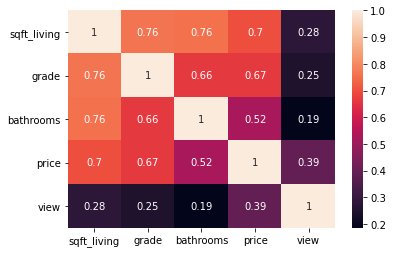

In [22]:
import seaborn as sns
sns.heatmap(heat_plot_data.corr(), annot=True);
plt.savefig('../../../data/heatmap_basic.png');

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,Seattle,Snoqualmie,Woodinville,sqft_living_diff,sqft_lot_diff,year,x0_fall,x0_spring,x0_summer,x0_winter
price,1.000000,0.315489,0.523554,0.700111,0.087857,0.257886,0.263293,0.394071,0.036223,0.665936,...,0.020874,-0.003567,0.031440,0.403289,0.049907,0.000262,0.001793,-0.006999,0.004448,0.001156
bedrooms,0.315489,1.000000,0.529223,0.593188,0.033279,0.187680,-0.003146,0.080454,0.023311,0.367529,...,-0.185116,0.024902,0.024449,0.445390,0.018152,-0.010390,0.002366,-0.006938,0.004051,0.000917
bathrooms,0.523554,0.529223,1.000000,0.755940,0.088031,0.503316,0.062969,0.186105,-0.126398,0.664513,...,-0.208438,0.068436,0.043676,0.503889,0.043124,-0.029610,0.001580,-0.010183,0.008870,-0.000057
sqft_living,0.700111,0.593188,0.755940,1.000000,0.172119,0.358539,0.104336,0.282074,-0.060347,0.762367,...,-0.218916,0.065819,0.080648,0.665854,0.073888,-0.031567,-0.002725,-0.009928,0.011709,0.001037
sqft_lot,0.087857,0.033279,0.088031,0.172119,1.000000,-0.003450,0.021483,0.075554,-0.009976,0.113437,...,-0.138971,0.006460,0.092889,0.099997,0.755129,0.005506,-0.010818,0.003407,-0.000581,0.008679
floors,0.257886,0.187680,0.503316,0.358539,-0.003450,1.000000,0.021157,0.028848,-0.263395,0.459227,...,-0.036866,0.086419,0.014891,0.222888,0.003636,-0.024884,-0.000934,-0.003991,-0.001380,0.007576
waterfront,0.263293,-0.003146,0.062969,0.104336,0.021483,0.021157,1.000000,0.381187,0.016636,0.082979,...,0.024728,-0.009923,-0.012443,0.063986,0.001935,-0.006275,0.001600,0.008775,-0.013005,0.003192
view,0.394071,0.080454,0.186105,0.282074,0.075554,0.028848,0.381187,1.000000,0.044459,0.249708,...,0.069430,0.010216,-0.038407,0.113236,0.038856,-0.000266,-0.004956,0.000369,-0.000961,0.006267
condition,0.036223,0.023311,-0.126398,-0.060347,-0.009976,-0.263395,0.016636,0.044459,1.000000,-0.148139,...,0.016031,-0.067494,-0.020079,0.015841,-0.010279,-0.047458,-0.006728,0.000490,-0.003110,0.010697
grade,0.665936,0.367529,0.664513,0.762367,0.113437,0.459227,0.082979,0.249708,-0.148139,1.000000,...,-0.183784,0.021156,0.091210,0.349395,0.049799,-0.034359,0.005571,-0.009520,0.009429,-0.006014
